# Simultaneuos & sequential mode

In this script we test that both simultaneous and sequential model perform the same output with the Boomerang neuron model

In [1]:
import jax.random as jrandom
import matplotlib.pyplot as plt

from felice.networks.implicit import Boomerang

In [3]:
x = jrandom.randint(jrandom.key(0), (20, 1), 0, 15)
model = Boomerang(
    d_model=1,
    d_state=16,
    d_inner=2,
    max_iters=None,
    dt=1e-3,
    key=jrandom.key(42),
)
out_parallel = model(x)
out_sequential = model.sequential(x)

In [4]:
import equinox as eqx
import jax.numpy as jnp


def loss_fn(model, x):
    output = model(x)
    return jnp.sum(output[-1])


gradient = eqx.filter_grad(loss_fn)(model, x)

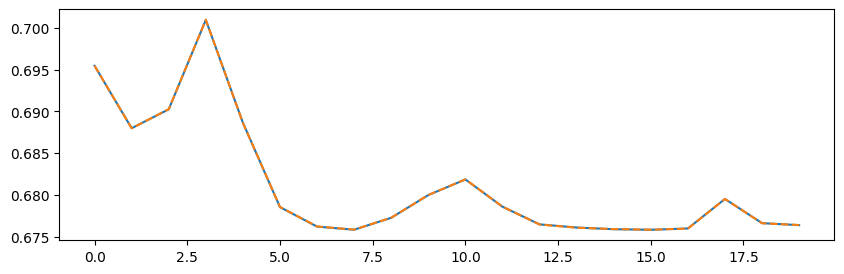

In [5]:
t = -1
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(out_parallel)
ax.plot(out_sequential, "--")
plt.show()

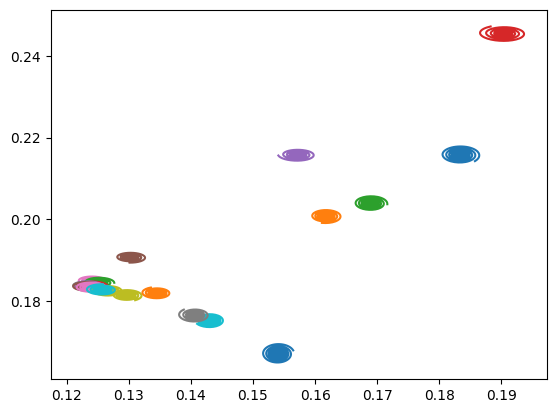

In [6]:
ts, ys = model.get_z(x, t0=2, t1=4, num_points=1000)
plt.figure()
plt.plot(ys[:, :, 0], ys[:, :, 1])
plt.show()